In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import seaborn as sns


In [56]:
# df = pd.read_csv('Dataset/city_day.csv')
# df

In [57]:
# df_hour = pd.read_csv('Dataset/city_hour.csv')
# df_hour

In [58]:
df_station_days = pd.read_csv('Dataset/station_day.csv')
df_station_days

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97330,WB013,2020-04-06,33.68,60.11,1.76,17.47,19.23,22.52,0.51,10.94,54.45,1.93,11.83,NaN,91.0,Satisfactory
97331,WB013,2020-04-07,39.34,66.08,1.70,11.55,13.25,22.84,0.55,13.84,69.96,1.71,10.18,NaN,98.0,Satisfactory
97332,WB013,2020-04-08,25.37,32.74,1.73,12.60,14.32,20.92,0.46,10.43,65.75,1.42,9.72,NaN,90.0,Satisfactory
97333,WB013,2020-04-09,21.62,31.95,1.63,15.40,17.04,21.48,0.50,13.78,86.21,1.28,10.47,NaN,118.0,Moderate


In [59]:
# df_station_hour = pd.read_csv('Dataset/station_hour.csv')
# df_station_hour.head()

In [60]:
df_station_days.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97335 entries, 0 to 97334
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StationId   97335 non-null  object 
 1   Date        97335 non-null  object 
 2   PM2.5       75636 non-null  float64
 3   PM10        56185 non-null  float64
 4   NO          80032 non-null  float64
 5   NO2         81854 non-null  float64
 6   NOx         82655 non-null  float64
 7   NH3         52258 non-null  float64
 8   CO          81011 non-null  float64
 9   SO2         72693 non-null  float64
 10  O3          73308 non-null  float64
 11  Benzene     65905 non-null  float64
 12  Toluene     60495 non-null  float64
 13  Xylene      19383 non-null  float64
 14  AQI         77414 non-null  float64
 15  AQI_Bucket  77414 non-null  object 
dtypes: float64(13), object(3)
memory usage: 11.9+ MB


In [61]:
df_station_days['Date'] = pd.to_datetime(df_station_days['Date'])
df_station_days.set_index('Date', inplace=True)

In [62]:
df_station_days.head()

,StationId,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2017-11-24,AP001,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
2017-11-25,AP001,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2017-11-26,AP001,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2017-11-27,AP001,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
2017-11-28,AP001,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [63]:
df_station_days.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,75636.000000,56185.000000,80032.000000,81854.000000,82655.000000,52258.000000,81011.000000,72693.000000,73308.000000,65905.000000,60495.000000,19383.000000,77414.000000
mean,84.825523,167.467689,24.455583,37.024831,43.504385,30.328648,1.644048,12.437712,38.171303,3.461241,15.635195,2.511517,188.494872
std,78.398281,126.389213,35.478577,30.248716,46.429877,25.505255,4.492780,13.409725,40.455009,11.775976,29.494306,6.837707,134.295656
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,34.520000,75.940000,5.340000,16.220000,15.150000,13.190000,0.560000,5.010000,18.980000,0.150000,0.730000,0.000000,90.000000
50%,60.035000,132.120000,11.020000,28.960000,28.710000,25.100000,0.950000,8.970000,30.650000,1.110000,4.380000,0.330000,142.000000
75%,106.680000,223.200000,26.760000,49.250000,53.770000,39.840000,1.500000,15.110000,46.650000,3.700000,18.530000,2.000000,276.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [64]:
print("count of null values in each column:", df_station_days.isnull().sum())
print("shape of the dataset:", df_station_days.shape)
print("duplicated values in the dataset:", df_station_days.duplicated().sum())

count of null values in each column: StationId         0
PM2.5         21699
PM10          41150
NO            17303
NO2           15481
NOx           14680
NH3           45077
CO            16324
SO2           24642
O3            24027
Benzene       31430
Toluene       36840
Xylene        77952
AQI           19921
AQI_Bucket    19921
dtype: int64
shape of the dataset: (97335, 15)
duplicated values in the dataset: 11682


In [65]:
df_station_days.drop_duplicates(inplace=True)

In [66]:
df_station_days.drop(["StationId","AQI_Bucket"], axis=1, inplace=True)

In [67]:
# df_station_hour.dropna(inplace=True)
df_clean=df_station_days.interpolate(method='time', limit_direction='both')

In [68]:
df_clean.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,
2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,348.0
2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0


In [69]:
print("records after removing null values:", df_clean.shape)

records after removing null values: (85653, 13)


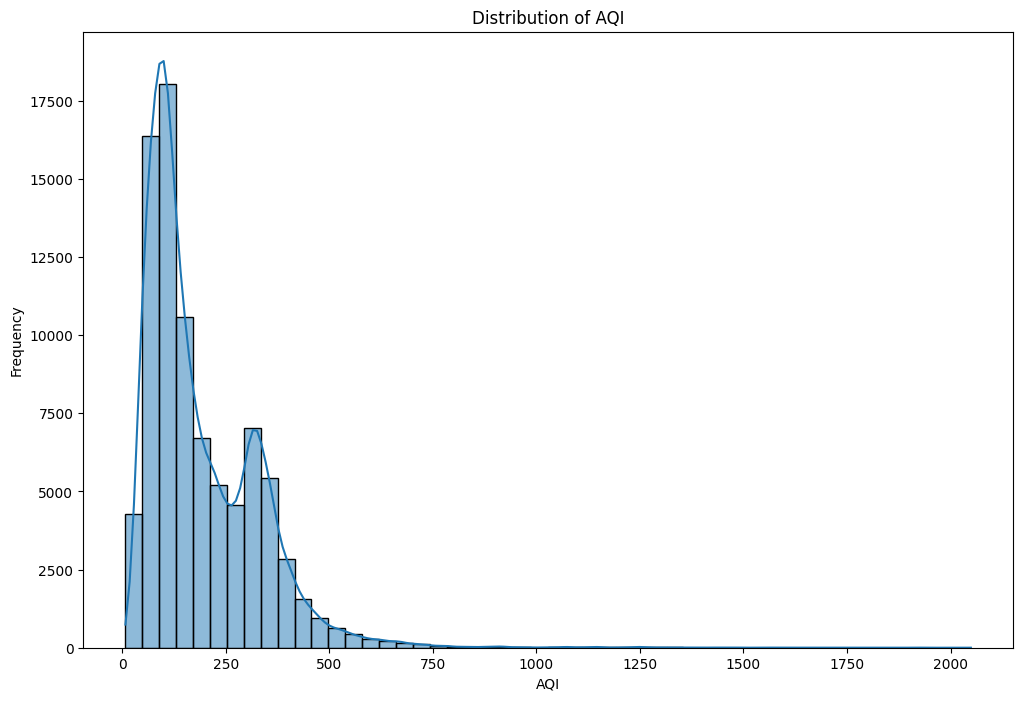

In [70]:
#Visualisasi distribusi target AQI_bucket
plt.figure(figsize=(12,8))
sns.histplot(data=df_clean, x='AQI', bins=50, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


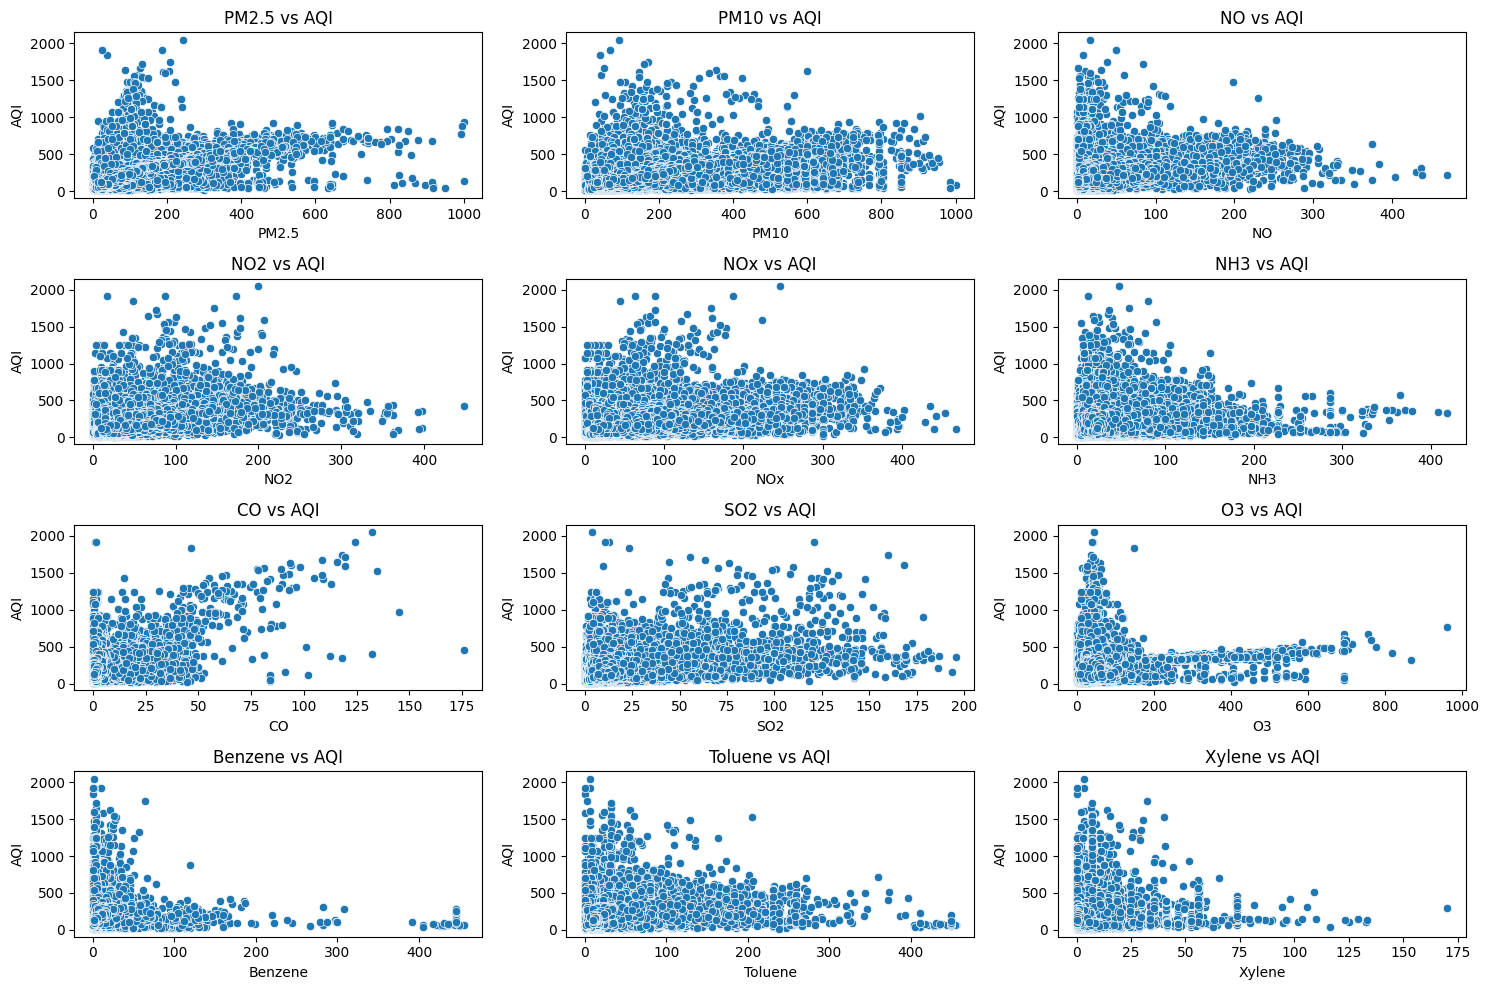

In [71]:
# visualisasi features dengan AQI
plt.figure(figsize=(15,10))
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
for i, feature in enumerate(features[:-1]):
    plt.subplot(4, 3, i+1)
    sns.scatterplot(data=df_clean, x=feature, y='AQI')
    plt.title(f'{feature} vs AQI')
    plt.xlabel(feature)
    plt.ylabel('AQI')
plt.tight_layout()
plt.show()


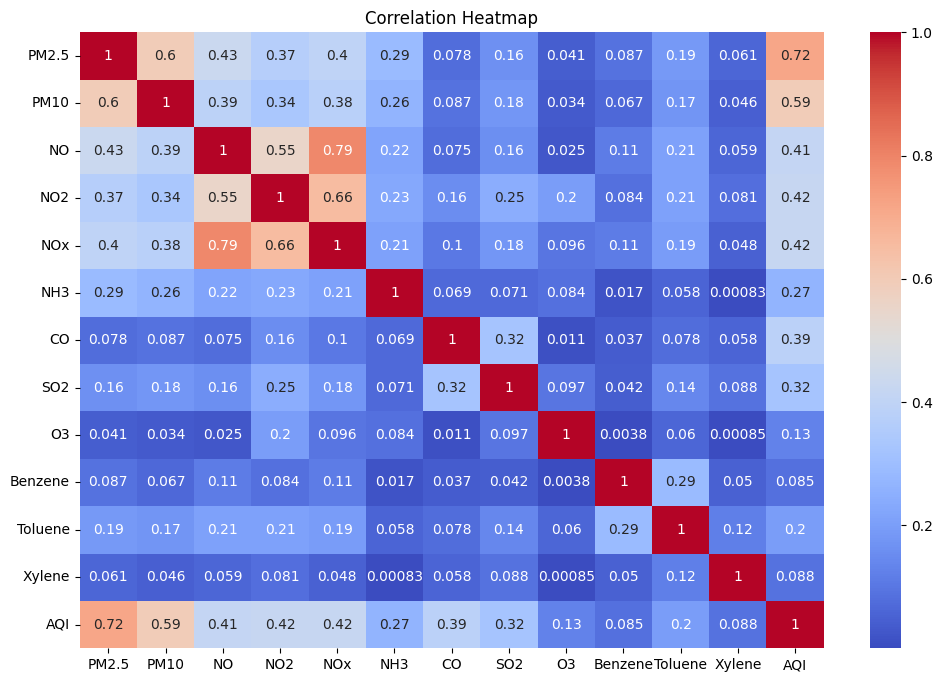

In [72]:
#corelation heatmap
numeric_features = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
correlation = numeric_features.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [73]:
def create_features(df):
    """
    Membuat fitur time series (waktu, lag, dan rolling).
    """
    # 1. Fitur Waktu
    df_clean['dayofweek'] = df_clean.index.dayofweek
    df_clean['month'] = df_clean.index.month
    
    # 2. Fitur Lag dan Rolling untuk AQI (Target)
    # Kita hanya fokus pada AQI untuk model autoregressive
    feature = 'AQI'
    window = 7
    
    df_clean[f'{feature}_lag_1d'] = df_clean[feature].shift(1)
    df_clean[f'{feature}_lag_7d'] = df_clean[feature].shift(window)
    df_clean[f'{feature}_roll_mean_7d'] = df_clean[feature].rolling(window=window).mean()
    df_clean[f'{feature}_roll_std_7d'] = df_clean[feature].rolling(window=window).std()
    
    return df

df= create_features(df_clean)

In [74]:
df.dropna(inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,dayofweek,month,AQI_lag_1d,AQI_lag_7d,AQI_roll_mean_7d,AQI_roll_std_7d
Date,,,,,,,,,,,,,,,,,,,
2017-12-01,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.0,4,12,165.0,348.0,185.142857,12.266874
2017-12-02,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.0,5,12,191.0,184.0,186.142857,12.442248
2017-12-03,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.0,6,12,191.0,197.0,190.428571,19.797787
2017-12-04,84.64,125.00,4.02,26.98,17.58,14.41,0.18,9.84,112.41,0.31,3.53,0.09,168.0,0,12,227.0,198.0,186.142857,21.090508
2017-12-05,88.36,121.77,3.70,20.23,13.75,13.72,0.12,14.02,117.93,0.24,2.92,0.03,198.0,1,12,168.0,188.0,187.571429,21.570482


In [75]:
# make model for prediction AQI for 2 days
X=df.drop('AQI', axis=1)
y=df['AQI']
split_percent=0.8
split_index=int(len(X)*split_percent)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)




Train data shape: (68516, 18)
Test data shape: (17130, 18)


Mean Squared Error (MSE): 2067.678208736074
Root Mean Squared Error (RMSE): 45.471729775059956
Mean Absolute Error (MAE): 26.287209227651584
R-squared (R2 ): 0.8479798915439496


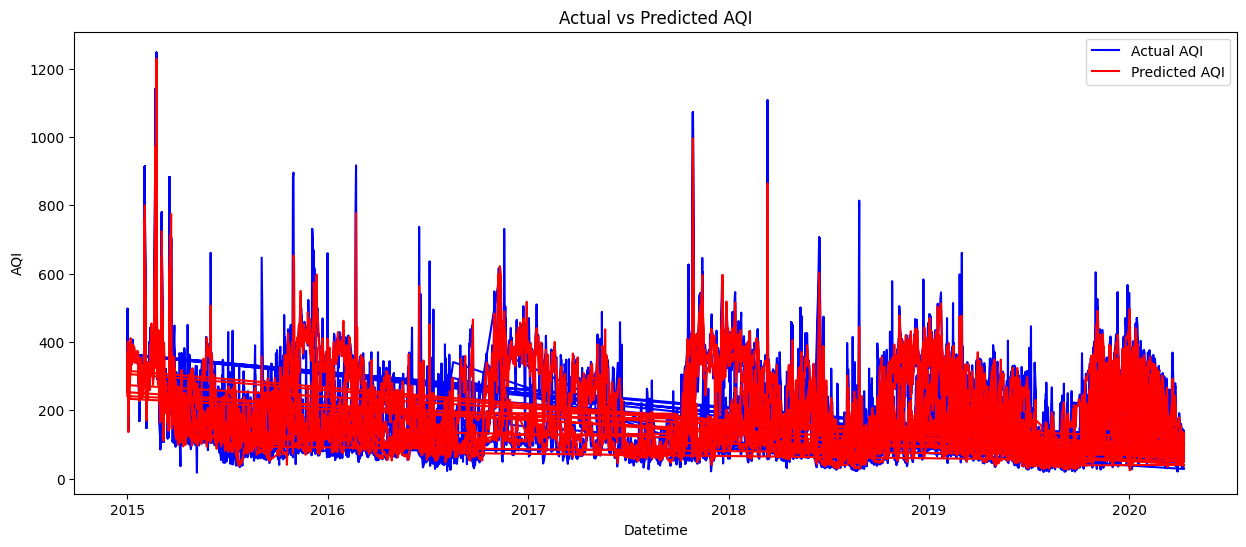

In [93]:
#import randomforest regressor
# from sklearn.ensemble import RandomForestRegressor
# model_auto = RandomForestRegressor(
#     n_estimators=100,      
#     random_state=42,
#     n_jobs=-1,           
#     max_depth=10,         
#     min_samples_leaf=5      
# )
# buat model pakei xgboost
from xgboost import XGBRegressor
model_auto = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_auto.fit(X_train, y_train)
y_pred = model_auto.predict(X_test)
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2 ): {r2}')
# Visualisasi hasil prediksi
plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test, label='Actual AQI', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted AQI', color='red')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.show()


In [94]:
#evaluasi data latih
y_train_pred = model_auto.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print(f'Train Mean Squared Error (MSE): {mse_train}')
print(f'Train Root Mean Squared Error (RMSE): {rmse_train}')
print(f'Train Mean Absolute Error (MAE): {mae_train}')
print(f'Train R-squared (R2 ): {r2_train}')


Train Mean Squared Error (MSE): 1629.9470364637482
Train Root Mean Squared Error (RMSE): 40.372602547566196
Train Mean Absolute Error (MAE): 24.17396776936046
Train R-squared (R2 ): 0.9175107089280277


In [95]:
#buat prediksi untuk 2 hari kedepan
future_steps = 2
history_df = df.iloc[-7:].copy() 
future_predictions = [] 
last_datetime = history_df.index[-1]
current_aqi_history = list(history_df['AQI'])

print(f"Starting prediction from: {last_datetime}")
print(f"History length: {len(current_aqi_history)} days")

Starting prediction from: 2020-04-10 00:00:00
History length: 7 days


In [96]:
for i in range(1, 3): 
    
    future_time = last_datetime + pd.Timedelta(days=i)
    dayofweek = future_time.dayofweek
    month = future_time.month  
    
    aqi_lag_1d = current_aqi_history[-1]   
    aqi_lag_7d = current_aqi_history[-7] 
    
    aqi_roll_mean_7d = np.mean(current_aqi_history) 
    aqi_roll_std_7d = np.std(current_aqi_history)   
 
    last_features = history_df.iloc[-1]
    
    current_features = np.array([
        last_features['PM2.5'], last_features['PM10'], last_features['NO'], 
        last_features['NO2'], last_features['NOx'], last_features['NH3'], 
        last_features['CO'], last_features['SO2'], last_features['O3'], 
        last_features['Benzene'], last_features['Toluene'], last_features['Xylene'],
        dayofweek, month, aqi_lag_1d, aqi_lag_7d, aqi_roll_mean_7d, aqi_roll_std_7d  
    ]).reshape(1, -1) 
    
    new_pred = model_auto.predict(current_features)[0]
    
    future_predictions.append(new_pred)
    
    # Update history: Tambahkan prediksi baru, buang nilai terlama
    current_aqi_history.append(new_pred)
    current_aqi_history.pop(0) 

print("Prediksi 2 hari selesai.")

# --- LANGKAH 5: SIMPAN DAN PLOT HASIL ---

print("Langkah 5: Menyimpan Hasil...")


print(f"Number of predictions: {len(future_predictions)}")
days_ahead = list(range(1, len(future_predictions) + 1))  # Dynamic range based on actual predictions
print(f"Days ahead range: {days_ahead}")

# 1. Buat DataFrame hasil prediksi
df_forecast = pd.DataFrame({
    'Days_Ahead': days_ahead,  
    'Predicted_AQI': future_predictions
})

print("\n--- Hasil Prediksi AQI 2 Hari ke Depan ---")
print(df_forecast) 

# # 4. Plot
# plot_filename = '2_day_forecast_plot.png'
# plt.figure(figsize=(12, 6))
# plt.plot(df_forecast['Days_Ahead'], df_forecast['Predicted_AQI'], marker='o', linestyle='--')
# plt.title('Prediksi AQI 2 Hari ke Depan')
# plt.xlabel('Hari ke Depan (dari sekarang)')
# plt.ylabel('Prediksi AQI')
# plt.grid(True)
# plt.show()

Prediksi 2 hari selesai.
Langkah 5: Menyimpan Hasil...
Number of predictions: 2
Days ahead range: [1, 2]

--- Hasil Prediksi AQI 2 Hari ke Depan ---
   Days_Ahead  Predicted_AQI
0           1     100.143059
1           2      95.497528


In [81]:
# # make model for AQI prediction
# X = df2.drop('AQI', axis=1)
# y = df2['AQI']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# # evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {rmse}')
# print(f'Mean Absolute Error: {mae}')
# print(f'R^2 Score: {r2}')
# # visualize the predicted vs actual values
# plt.figure(figsize=(10,6))
# plt.scatter(y_test, y_pred, alpha=0.7)
# plt.xlabel('Actual AQI')
# plt.ylabel('Predicted AQI')
# plt.title('Actual vs Predicted AQI')
# plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
# plt.show()
